The Dart Experiment

In [2]:
import random as rd

In [3]:
#estimating the value of pi - dart experiment

def monteCarloPi(numSamples):
    dartsInCircle = 0
    for i in range(numSamples):
        x=rd.uniform(0,1)
        y=rd.uniform(0,1)
        if (x**2 + y**2) <= 1:
            dartsInCircle += 1
    estimate = 4*dartsInCircle / (numSamples * 1.0)
    return estimate

In [4]:
monteCarloPi(10000000)

3.141686

The Double Slit Experiment

In [52]:
import numpy as np

In [53]:
#parameters used
#m = particle mass in kg 
#v = particle velocity in m/s

#lamb = h(m*v) de broglie wavelength, scaled to be used in this modeled, h=6.
#a = slit width in metres
#d = distance betwen slits in metres
#L = distance to screen in metres

def Diffraction(a,d,lamb,l,x):

    #calculating some constants
    c = (np.pi*d)/(lamb*l)
    k = (np.pi*a)/(lamb*l)

    #probability function
    probability = ((np.cos(c*x))**2)*(((np.sin(k*x))/(k*x))**2)

    return probability

In [54]:
def MonteCarlo(a,d,lamb,l):

    #monte carlo throw for a particle at a given position on our viewing screen 
    x = np.random.uniform(-.001,.001) #between -1mm and 1mm

    p = Diffraction(a,d,lamb,l,x)
    rand = np.random.uniform(0,1)

    if (p >= rand):
        return x

In [55]:
#parameters of our system
m = 9.1*10**-31 #mass of electron 
v = 5*10**5 #velocity

lamb = 6.62*10**-34/(m*v) #de broglie wavelength
a = 150*10**-6 #slit width
d = 600*10**-6 #distance between slits
l = 10 #distance to screen

#the loop that runs the monte carlo to generate the interference pattern
numParticles = 10**6
particles = []
for i in range(numParticles):
    #rolling a random y value as well to give our bands vertical spread
    y = np.random.uniform(0,1)
    x = MonteCarlo(a,d,lamb,l)

    if x != None:
        particles.append([x,y])

In [56]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

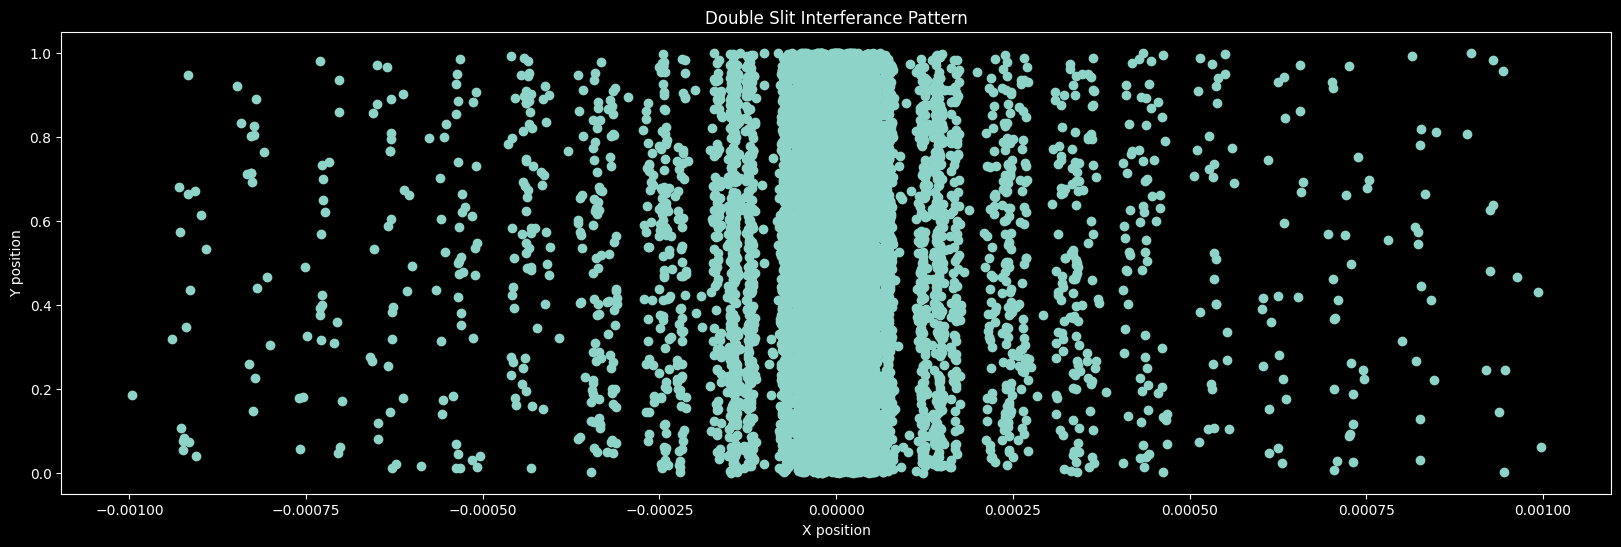

<Figure size 1200x600 with 0 Axes>

In [57]:
#visualise the interference pattern
particles = np.array(particles)
plt.figure(figsize = (20,6))
plt.scatter(particles[:,0],particles[:,1])
plt.title("Double Slit Interferance Pattern")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.show()

plt.figure(figsize = (12,6))

plt.tight_layout()
plt.show()

Portfolio Risk Management

In [59]:
import pandas as pd #pandas: library for data manipulation and analysis
import numpy as np #numpy: library for support for large, multi-dimensional arrays and matrices, and for collection of high-level mathematical functions
import matplotlib.pyplot as plt #matplotlib: library to create 2D graphs and plots
import datetime as dt #datetime: library to manipulate dates and times
from pandas_datareader import data as pdr #extension of pandas library to extract data from internet sources into pandas dataframe
import yfinance as yfin #yfinance: threaded and pythonic way to download market data from yahoo finance

In [60]:
#import and extract data

def get_data(stocks, start, end):
    yfin.pdr_override()
    stockData = pdr.get_data_yahoo(stocks, start, end) #extract financial data from yahoo finance
    stockData = stockData['Close'] #extract close prices of designated stocks
    returns = stockData.pct_change() #extract daily price (percentage) change of designated stocks
    meanReturns = returns.mean() #extract average price performance of designated stocks
    covMatrix = returns.cov() #extract covariance of return of designated stocks
    return meanReturns, covMatrix


In [63]:
stockList = ['BNS.TO','GOOGL','XOM','NIO','KO','PEP','ARCC','IBM','AGNC','LCID'] #selection list of stocks (portfolio)
stocks = [stock for stock in stockList]
endDate = dt.datetime.now() #define end and start dates (today and 300 days ago)
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate) #calculate mean and covariance of returns

weights = np.random.random(len(meanReturns)) #weight of each stock (defined randomly here) in portfolio
weights /= np.sum(weights)

[*********************100%%**********************]  10 of 10 completed
/var/folders/xt/40yqc8kx5z36w2d8jh4qqm600000gn/T/ipykernel_9245/4157401696.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stockData.pct_change() #extract daily price (percentage) change of designated stocks


In [65]:
#monte carlo simulation
#run 100 simulations at a timeframe of 100 days
mc_sims = 100 #number of simulations
T = 100 #timeframe in days

meanM = np. full(shape=(T, len(weights)), fill_value=meanReturns) #create empty array and fill it with mean returns of stocks, take the transpose 
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0) #create empty array to record output of portfolio simulations

initialPortfolio = 47000 #define arbitrarily value of portfolio

for m in range(0, mc_sims): #create loop event to determine possible portfolios
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's - generate random numbers from normal distribution
    L = np.linalg.cholesky(covMatrix) #cholesky decomposition to lower triangular matrix - mathematical transformation for efficient numerical solution
    dailyReturns = meanM + np.inner(L,Z) #correlated daily returns for individual stocks - calculate daily returns based on generated random covariance between stock prices
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

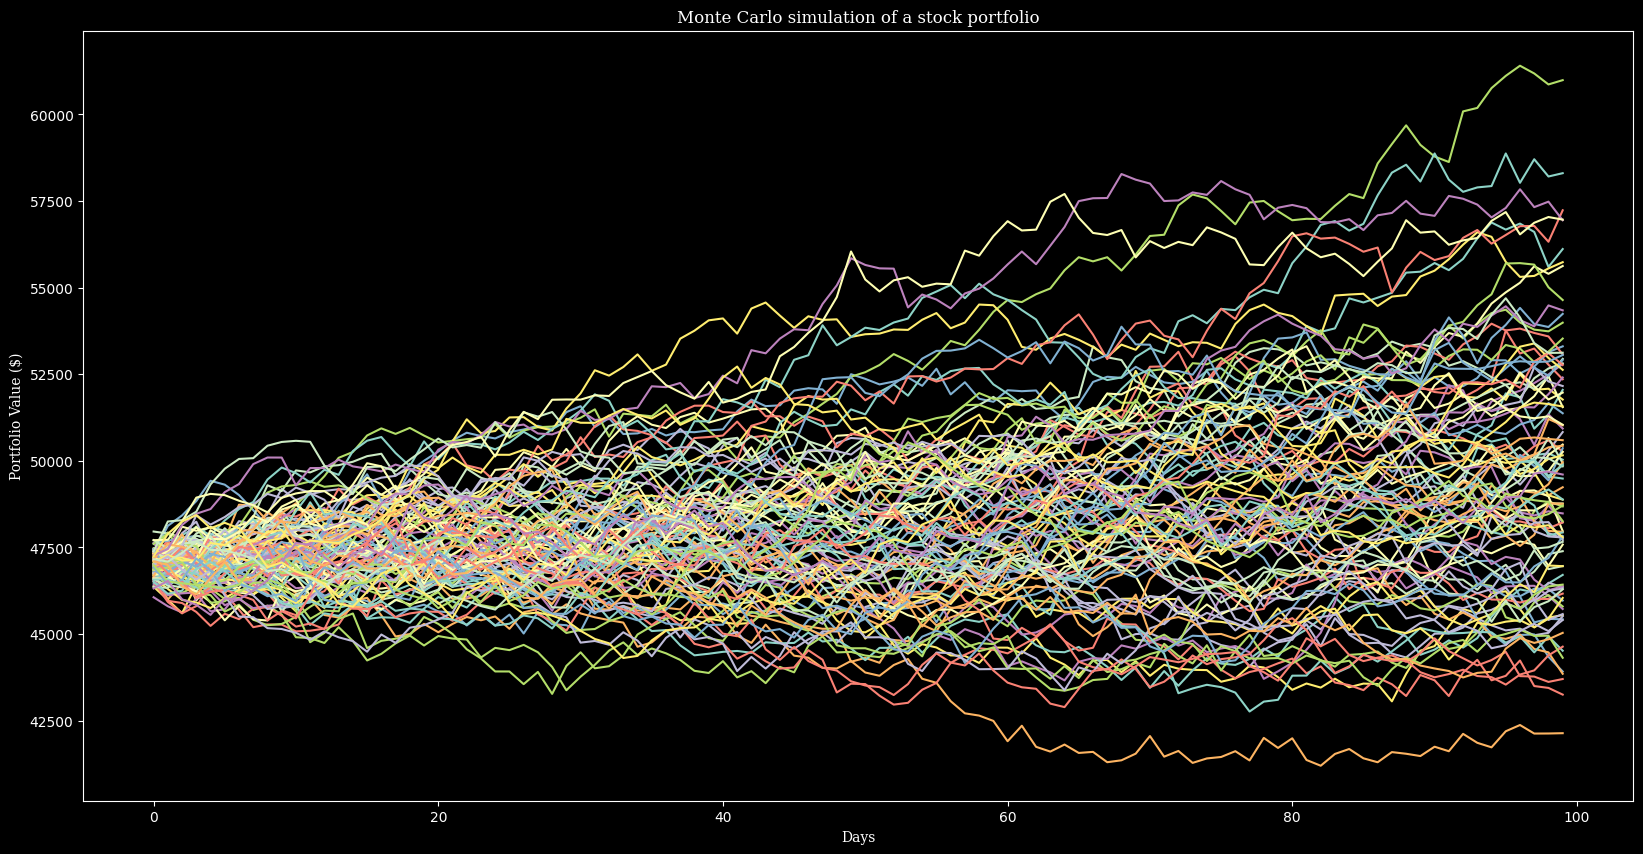

In [69]:
font = {'family' : 'serif'}
plt.figure(figsize=(20,10))
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)', fontdict=font)
plt.xlabel('Days', fontdict=font)
plt.title('Monte Carlo simulation of a stock portfolio', fontdict=font)
plt.show()

Polymer folding

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time #adding timer using a clock

In [6]:
#set parameters
start_time = time.process_time()
loop_time = start_time #start time for loop timer
# %% constants and variables
n = 100 #number of beads in a polymer
pol = 10 #number of polymers
max_attempts = 100 #maximum attempts to place a new bond
epsilon = 0.25 #depth of the potential well
sigma = 0.8 #finite distance at which the inter-particle potential is zero
T = 1.0 #temperature 
size = 0
# %% allocation
pos = np.zeros((pol,n,2), dtype=float) #positions of the atoms for every polymer


In [7]:
#define lennard-jones energy potential
def lennard_jones_potential(r):
    """
    Calculate the Lennard-Jones potential.
    :param r: Distance between two particles
    :return: Lennard-Jones potential
    """
    return 4 * epsilon * ((sigma/r) ** 12 - (sigma/r) ** 6)

In [8]:
#calculate total potential energy of the system (polymer chain)
def calculate_total_energy(positions, atom):
    """
    Calculate the total energy of the polymer up to a given atom.
    :param positions: Positions of the atoms in the polymer
    :param atom: Index of the last atom to consider
    :return: Total energy
    """
    energy = 0.0
    for i in range(atom):
        for j in range(i + 1, atom + 1):
            r = np.linalg.norm(positions[i] - positions[j])
            if r != 0:
                energy += lennard_jones_potential(r)
    return energy

In [9]:
#define the monte carlo random sampling process (metropolis)
def metropolis_criterion(old_energy, new_energy):
    """
    Decide whether to accept the new state based on the Metropolis criterion.
    :param old_energy: Energy of the old state
    :param new_energy: Energy of the new state
    :return: True if the new state is accepted, False otherwise
    """
    if new_energy < old_energy:
        return True
    else:
        delta_energy = new_energy - old_energy
        acceptance_probability = np.exp(-delta_energy / T)
        return np.random.rand() < acceptance_probability

In [10]:
#attempt to add additional bead to polymer chain
def attempt_add_bead(atom, position, fixed_distance=1.0):
    """
    Attempts to add a new bead to a polymer with a fixed distance from the previous bead and self-avoidance. 
    :param atom: The index of the new bead to be added
    :param position: Current positions of the polymer
    :param fixed_distance: Fixed distance between consecutive beads
    :return: New position of the bead, None if no valid position is found
    """
    old_energy = calculate_total_energy(position, atom - 1)
    for _ in range(max_attempts):
        angle = np.random.uniform(0, 2 * np.pi)
        new_position = position[atom - 1] + fixed_distance * np.array([np.cos(angle), np.sin(angle)])

        #check for self-avoidance
        if not np.any(np.all(np.isclose(position[:atom], new_position), axis=1)):
            position[atom] = new_position
            new_energy = calculate_total_energy(position, atom)
            if metropolis_criterion(old_energy, new_energy):
                return new_position
    return None

In [11]:
#calculate end-to-end distance and radius of gyration
def calculate_end_to_end_dist(positions):
    return np.linalg.norm(positions[:,-1] - positions[:,0], axis=1)

def calculate_radius_of_gyration(positions):
    center_of_mass = np.mean(positions, axis=1)
    squared_distance = np.sum((positions - center_of_mass[:, np.newaxis, :]) ** 2, axis=2)
    return np.sqrt(np.mean(squared_distance, axis=1))

In [12]:
#run monte carlo simulation
for polymer in range(pol):
    for atom in range(1, n):
        new_pos = attempt_add_bead(atom, pos[polymer])
        if new_pos is None:
            size = atom
            break #stop growing this polymer if no valid position is found
print("Pol %4.0f Made of %4.0f beads in %6.4f seconds" % (polymer, size, time.process_time() - start_time))

Pol    9 Made of   67 beads in 7.9122 seconds


In [13]:
#perform analysis
end_to_end_dist = calculate_end_to_end_dist(pos)
mean_end_to_end_dist = np.mean(end_to_end_dist)
std_end_to_end_dist = np.std(end_to_end_dist)

radius_of_gyration = calculate_radius_of_gyration(pos)
mean_radius_of_gyration = np.mean(radius_of_gyration)
std_radius_of_gyration = np.std(radius_of_gyration)

print(f"Mean end-to-end distance: {mean_end_to_end_dist:.2f}")
print(f"Standard deviation of end-to-end distance: {std_end_to_end_dist:.2f} ")
print(f"Mean radius of gyration: {mean_radius_of_gyration:.2f}")
print(f"Standard deviation of radius of gyration: {std_radius_of_gyration:.2f}")

Mean end-to-end distance: 14.25
Standard deviation of end-to-end distance: 17.86 
Mean radius of gyration: 7.40
Standard deviation of radius of gyration: 2.74


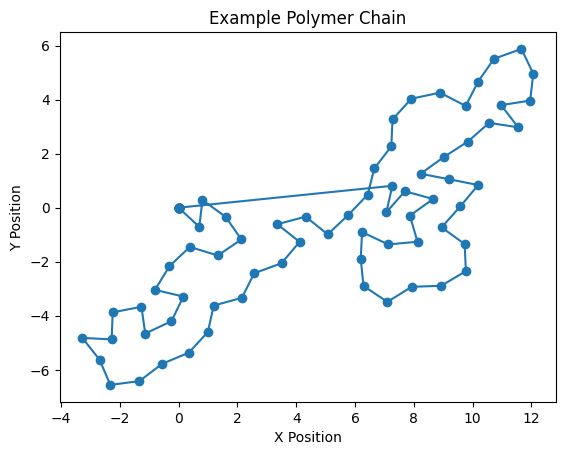

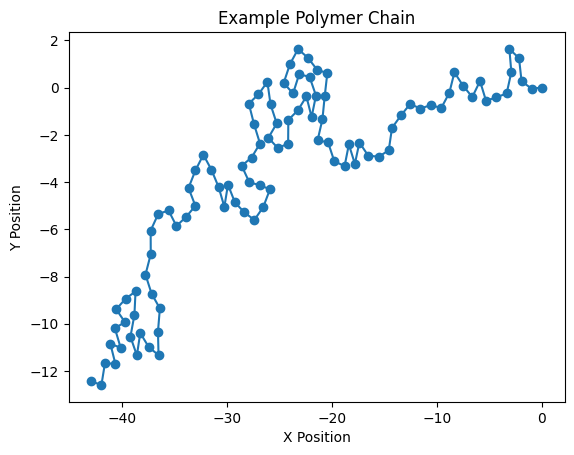

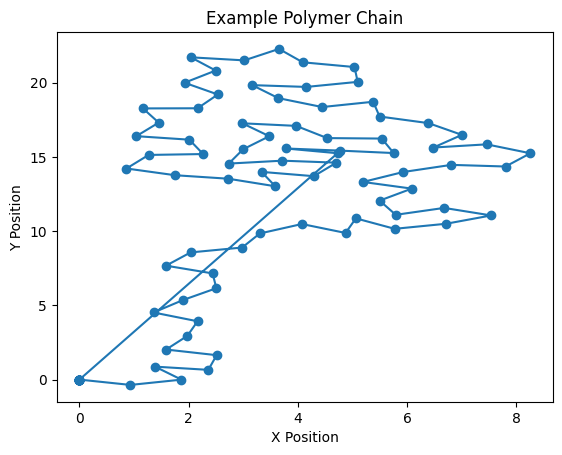

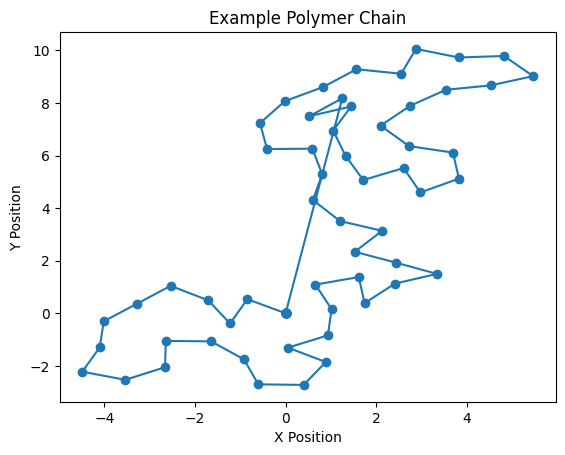

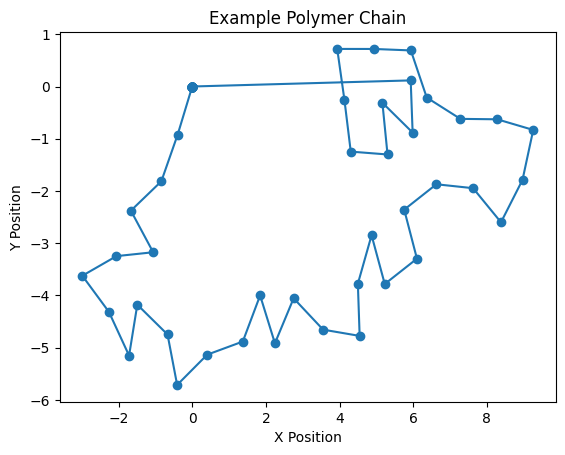

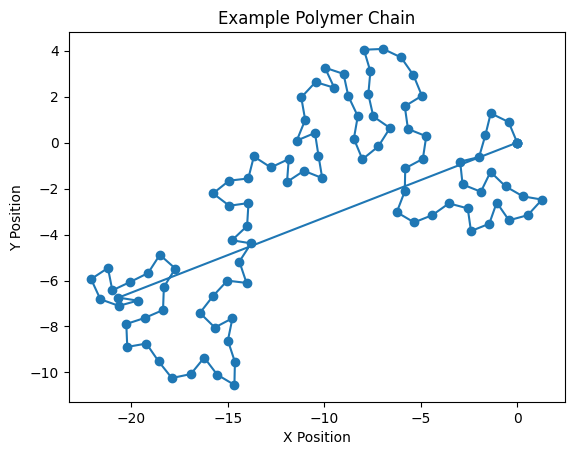

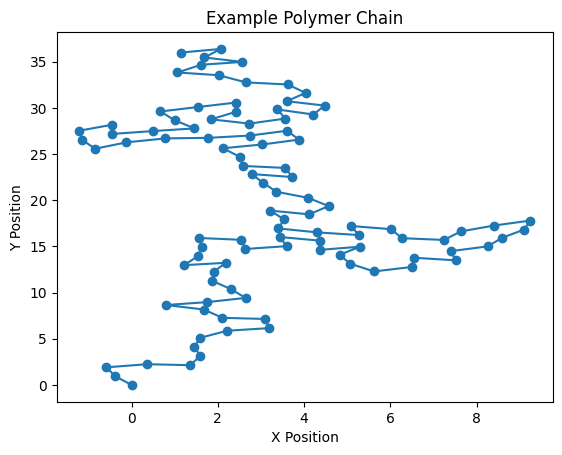

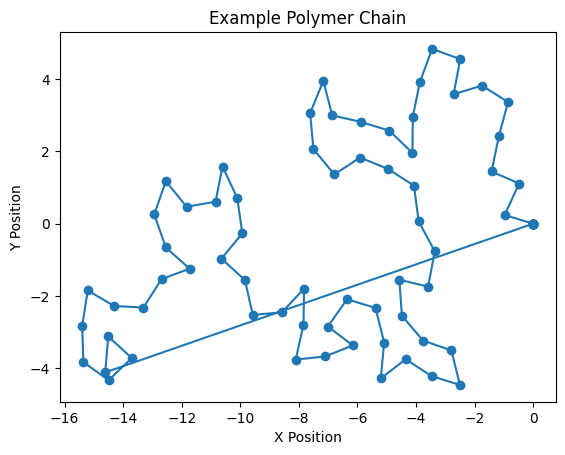

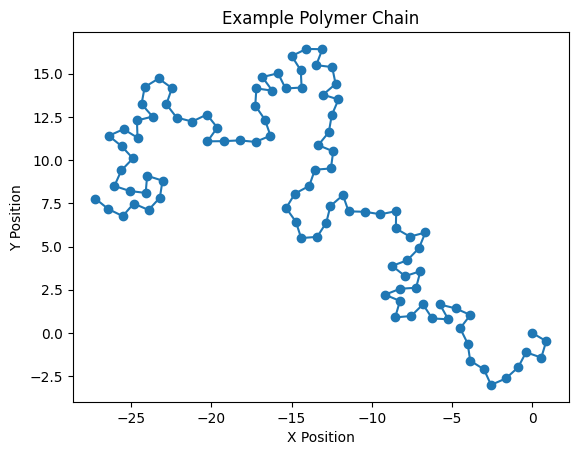

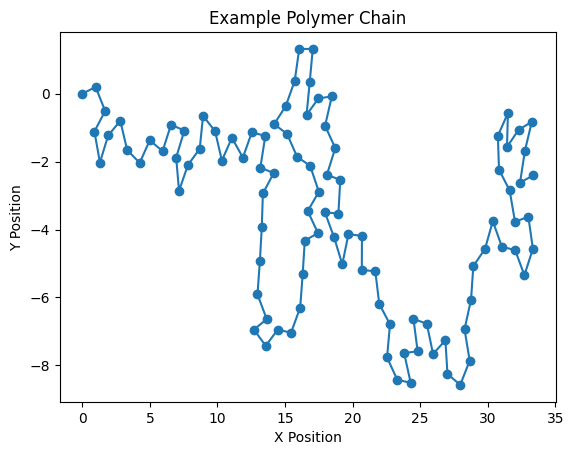

In [14]:
#plot polymers
# %% plotting an example polymer
for i in range(10):
    plt.figure(i+2)
    plt.plot(pos[i-2, :, 0], pos[i-2, :, 1], '-o')
    plt.title("Example Polymer Chain")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show(block=False)
plt.show()